In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [9]:
len(x_test)

10000

In [5]:
x_train[0].shape

(28, 28)

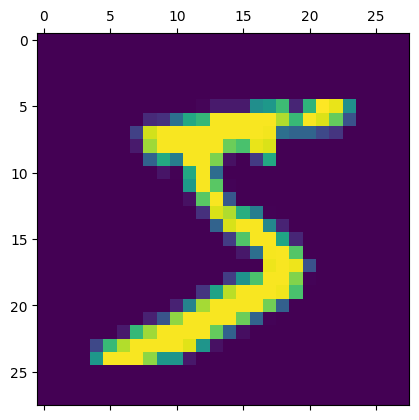

In [6]:
plt.matshow(x_train[0])

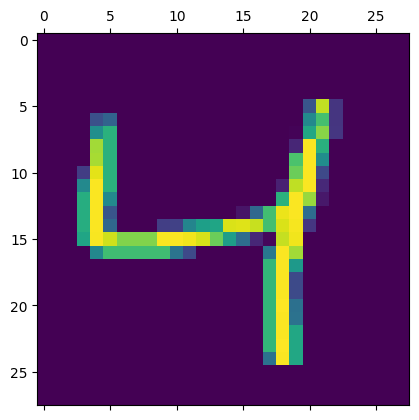

In [7]:
plt.matshow(x_train[2])

In [8]:
y_train[2]

np.uint8(4)

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
x_train.shape

(60000, 28, 28)

In [ ]:
# Flatten array - convert 2d to 1d array
x_train_flattened = x_train.reshape(len(x_train), 28*28)
x_train_flattened.shape

(60000, 784)

In [14]:
x_test_flattened = x_test.reshape(len(x_test), 28*28) 
x_test_flattened.shape

(10000, 784)

In [ ]:
# Create Simple Neural Network with input as 784 elements and output as 10 elements

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

In [18]:
# now need to compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [19]:
# Now train the model
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 401us/step - accuracy: 0.2877 - loss: 19.1675
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 368us/step - accuracy: 0.3061 - loss: 5.9760
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - accuracy: 0.2980 - loss: 5.4619
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - accuracy: 0.2972 - loss: 5.2157
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 389us/step - accuracy: 0.2878 - loss: 5.1123


In [21]:
# accuray is not good so we will scale the value like
x_train_flattened = x_train_flattened/255
x_test_flattened = x_test_flattened/255

In [22]:
model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 396us/step - accuracy: 0.7538 - loss: 1.3964
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 376us/step - accuracy: 0.8697 - loss: 0.9760
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 367us/step - accuracy: 0.8828 - loss: 0.6737
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 368us/step - accuracy: 0.8943 - loss: 0.4846
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 375us/step - accuracy: 0.9046 - loss: 0.3782


In [23]:
# So now accuracy is good with scale

# now evaluate accuracy on test dataset
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.8998 - loss: 0.3679


[0.3205853998661041, 0.914900004863739]

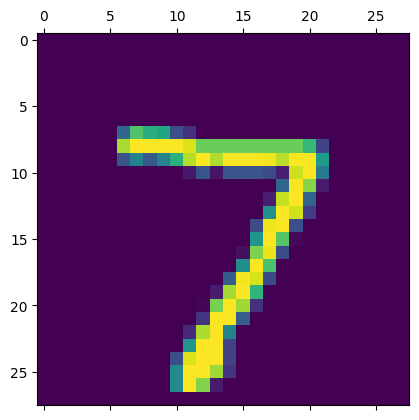

In [25]:
# check what is first image for test dataset
plt.matshow(x_test[0])

In [30]:
# check sample prediction
y_predict = model.predict(x_test_flattened)
y_predict[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step


array([1.7707502e-02, 2.2812748e-04, 4.9249470e-02, 7.2371924e-01,
       7.1663670e-02, 1.9583516e-01, 9.0765898e-06, 9.9871856e-01,
       1.2751578e-01, 7.8035212e-01], dtype=float32)

In [31]:
# now check max value from predict using numpy
np.argmax(y_predict[0])

np.int64(7)

So it's given 7 which is correct

In [34]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [38]:
y_predicted_labels = [np.argmax(i) for i in y_predict]
y_predicted_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

y_predict_labled matched with y_test data

In [40]:
# We can check confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 961,    0,    1,    1,    0,    3,   11,    1,    2,    0],
       [   0, 1115,    2,    2,    0,    3,    4,    0,    9,    0],
       [  12,   13,  899,   20,   15,    0,   13,   15,   40,    5],
       [   3,    2,   19,  914,    1,   25,    5,   13,   17,   11],
       [   1,    3,    3,    1,  912,    1,   14,    2,    7,   38],
       [  11,    7,    2,   34,   14,  760,   20,    8,   26,   10],
       [   9,    4,    5,    1,    7,   12,  917,    1,    2,    0],
       [   2,   19,   22,    3,   11,    0,    0,  932,    3,   36],
       [  11,   13,    8,   23,   12,   26,   11,   11,  844,   15],
       [  10,    9,    3,   13,   44,   10,    0,   20,    5,  895]],
      dtype=int32)>

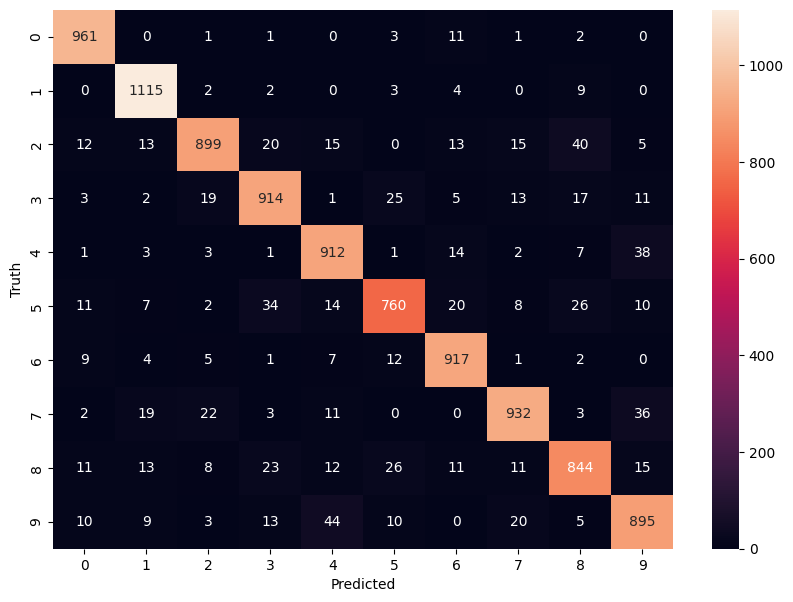

In [42]:
# print confusion matrix in visual way
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [43]:
# Add hidden layer to improve the performance
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# now need to compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

/Users/fullstack/AI/dl-env/lib/python3.9/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 754us/step - accuracy: 0.8755 - loss: 0.4409
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 689us/step - accuracy: 0.9611 - loss: 0.1267
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 713us/step - accuracy: 0.9755 - loss: 0.0846
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 650us/step - accuracy: 0.9810 - loss: 0.0636
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 676us/step - accuracy: 0.9852 - loss: 0.0488


In [44]:
# looks like accrurecy imporoved to 98%

# now evaluate test dataset
model.evaluate(x_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.9703 - loss: 0.0961


[0.07979269325733185, 0.9754999876022339]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 352us/step


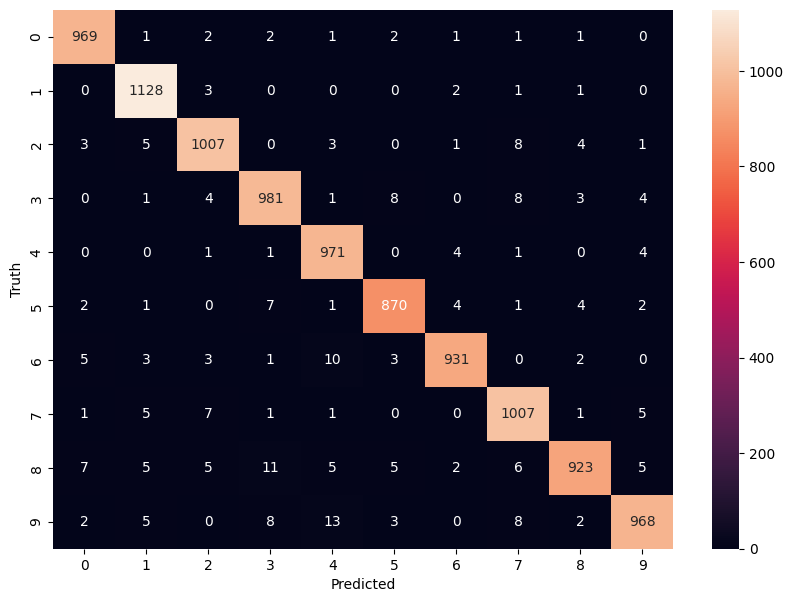

In [45]:
# before hidden layer accurecy was 92% and now is 97 so it's good improvement

# let's draw confussion matrix
# check sample prediction
y_predict = model.predict(x_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predict]

# We can check confusion matrix
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


Now we can see that number of errors has decreased

In [50]:
# If don't want to flatten array and wan to use 2D array
# We can use flatten hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

# now need to compile model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 632us/step - accuracy: 0.3760 - loss: 8.2165
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.4264 - loss: 0.4110
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 618us/step - accuracy: 0.3676 - loss: 0.2886
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 686us/step - accuracy: 0.3427 - loss: 0.2498
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - accuracy: 0.3250 - loss: 0.2317
